In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [ ]:
!pwd

/content


In [ ]:
# Saurav's Code begins from Here

In [ ]:
df_analyst = pd.read_csv("./master/data_analyst.csv")
df_software = pd.read_csv("./master/software_engineering.csv")
df_scientist = pd.read_csv("./master/data_scientist.csv")
df_data = pd.read_csv("./master/data_engineer.csv")

In [ ]:
# Merge all the DataFrames into a single DataFrame
merged_dataframe = pd.concat([df_analyst, df_software, df_scientist, df_data], ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_dataframe.to_csv("./merged_jobs.csv", index=False)

In [ ]:
df_master = pd.read_csv("./master/merged_jobs.csv")

In [ ]:
df_master.shape

(32641, 11)

In [ ]:
df_master.head()

job_title  \
0                      Data Analyst-SQL, Tableau   
1             Market Research & Insights Analyst   
2                    Business Systems Analyst `1   
3            Senior VAT and Indirect Tax Analyst   
4  Senior HRIS Analyst (Timekeeping and Payroll)   

                         company              job_location  \
0              Zortech Solutions         Mountain View, CA   
1  Indiana University Foundation           Bloomington, IN   
2                   Cook Medical           Bloomington, IN   
3                           Epic           Bloomington, IN   
4            Nordson Corporation  Greater Bloomington Area   

                                            job_link  first_seen  search_city  \
0    https://www.linkedin.com/jobs/data-analyst-jobs  2023-12-20  Bloomington   
1  https://www.linkedin.com/jobs/view/market-rese...  2023-12-20  Bloomington   
2  https://www.linkedin.com/jobs/view/business-sy...  2023-12-20  Bloomington   
3  https://www.linkedin.com/jobs/view/senior-vat-...  2023-12-20  Bloomington   
4  https://www.linkedin.com/jobs/view/senior-hris...  2023-12-20  Bloomington   

  search_country   job level job_type  \
0  United States   Associate   Onsite   
1  United States  Mid senior   Onsite   
2  United States  Mid senior   Onsite   
3  United States  Mid senior   Onsite   
4  United States  Mid senior   Remote   

                                         job_summary  \
0                                                NaN   
1  Company Description\nAre you a high-performer ...   
2  Overview\nThe Business Systems Analyst 1 perfo...   
3  We're looking for an experienced tax professio...   
4  Collaboration drives Nordson’s success as a ma...   

                                          job_skills  
0                                                NaN  
1  Data analysis, Market research, Survey develop...  
2  Business Analysis, Technical Writing, Software...  
3  Accounting, Finance, VAT/GST tax regimes, US a...  
4  Workday HCM, UKG Dimensions, Ceridian Dayforce...

In [ ]:
df_master.describe()

job_title            company   job_location  \
count                      32641              32641          32641   
unique                     13465               9150           3259   
top     Senior Software Engineer  Jobs for Humanity  United States   
freq                         794                805            598   

                                                 job_link  first_seen  \
count                                               32641       32641   
unique                                              29331           3   
top     https://ca.linkedin.com/jobs/view/customer-ser...  2023-12-20   
freq                                                    3       17236   

           search_city search_country   job level job_type  \
count            32641          32641       32641    32641   
unique             960              7           2        3   
top     Greater London  United States  Mid senior   Onsite   
freq               341          25283       26244    15707   

                                              job_summary  \
count                                               32230   
unique                                              24147   
top     Who is Recruiting from Scratch :\nRecruiting f...   
freq                                                  136   

                                               job_skills  
count                                               31368  
unique                                              31244  
top     Databricks, SQL, Python, PySpark, Azure Data F...  
freq                                                    7

In [ ]:
df_master.isna().sum()

job_title            0
company              0
job_location         0
job_link             0
first_seen           0
search_city          0
search_country       0
job level            0
job_type             0
job_summary        411
job_skills        1273
dtype: int64

In [ ]:
df_master.dropna(inplace=True)

In [ ]:
df_master.isna().sum()

job_title         0
company           0
job_location      0
job_link          0
first_seen        0
search_city       0
search_country    0
job level         0
job_type          0
job_summary       0
job_skills        0
dtype: int64

In [ ]:
df_master.shape

(31368, 11)

In [ ]:
df_master["search_country"].value_counts()

United States      24434
United Kingdom      2732
Canada              1779
Australia            810
 Canada              767
 United Kingdom      617
 Australia           229
Name: search_country, dtype: int64

In [ ]:
df_master['search_country'] = df_master['search_country'].str.strip()

In [ ]:
df_master["search_country"].value_counts()

United States     24434
United Kingdom     3349
Canada             2546
Australia          1039
Name: search_country, dtype: int64

In [ ]:
df_master["job_title"].value_counts()

Senior Software Engineer                                      793
Software Engineer                                             587
Data Analyst                                                  572
Senior Data Engineer                                          531
Data Engineer                                                 472
                                                             ... 
Senior Business Systems Analyst, Finance Systems                1
Senior FMV Analyst                                              1
BCBA - Board Certified Behavior Analyst                         1
Treasury Analyst Senior                                         1
Installation Supervisor Data Cables / International Travel      1
Name: job_title, Length: 13155, dtype: int64

**Start doing data cleaning and wrandling on this Master data.**
1. Make sure all the text values are cleaned.
2. There may be some **emoticons** present in the description make sure to handle those.
3. **Make sure that data is ready for downstream tasks.** As I will be building on top of that

In [ ]:
unique_list = []

for col in df_master.columns:
    item = (col, df_master[col].nunique(), df_master[col].dtypes, df_master[col].unique())
    unique_list.append(item)

unique_counts = pd.DataFrame(
    unique_list,
    columns=["Column", "Number_of_unique_values", "Type", "Unique_category"]
).sort_values(by="Number_of_unique_values")


display(unique_counts)

In [ ]:
df_master.drop('first_seen', axis=1, inplace=True)


In [ ]:
df_copy = df_master.copy()

In [ ]:
df_master = df_copy

In [ ]:
from geotext import GeoText

def extract_city_with_geotext(location):
    places = GeoText(location)
    cities = list(places.cities)
    return cities[0] if cities else 'Unknown'

df_master['city'] = df_master['job_location'].apply(extract_city_with_geotext)

In [ ]:
df_master.head()

job_title  \
1             Market Research & Insights Analyst   
2                    Business Systems Analyst `1   
3            Senior VAT and Indirect Tax Analyst   
4  Senior HRIS Analyst (Timekeeping and Payroll)   
5      Business Intelligence Reporting Analyst 2   

                         company              job_location  \
1  Indiana University Foundation           Bloomington, IN   
2                   Cook Medical           Bloomington, IN   
3                           Epic           Bloomington, IN   
4            Nordson Corporation  Greater Bloomington Area   
5                   Cook Medical           Bloomington, IN   

                                            job_link  search_city  \
1  https://www.linkedin.com/jobs/view/market-rese...  Bloomington   
2  https://www.linkedin.com/jobs/view/business-sy...  Bloomington   
3  https://www.linkedin.com/jobs/view/senior-vat-...  Bloomington   
4  https://www.linkedin.com/jobs/view/senior-hris...  Bloomington   
5  https://www.linkedin.com/jobs/view/business-in...  Bloomington   

  search_country   job level job_type  \
1  United States  Mid senior   Onsite   
2  United States  Mid senior   Onsite   
3  United States  Mid senior   Onsite   
4  United States  Mid senior   Remote   
5  United States  Mid senior   Hybrid   

                                         job_summary  \
1  Company Description\nAre you a high-performer ...   
2  Overview\nThe Business Systems Analyst 1 perfo...   
3  We're looking for an experienced tax professio...   
4  Collaboration drives Nordson’s success as a ma...   
5  Overview\nThe Business Intelligence Analyst 2 ...   

                                          job_skills         city  
1  Data analysis, Market research, Survey develop...  Bloomington  
2  Business Analysis, Technical Writing, Software...  Bloomington  
3  Accounting, Finance, VAT/GST tax regimes, US a...  Bloomington  
4  Workday HCM, UKG Dimensions, Ceridian Dayforce...      Unknown  
5  SAP Business Objects, SQL, Qlik, Data Modeling...  Bloomington

In [ ]:
unknown_city_rows = df_master[df_master['city'] == 'Unknown']
unknown_city_rows.count()

job_title         5847
company           5847
job_location      5847
job_link          5847
search_city       5847
search_country    5847
job level         5847
job_type          5847
job_summary       5847
job_skills        5847
city              5847
dtype: int64

In [ ]:
known_countries = ['United States', 'Australia', 'Canada']
known_regions = ['England', 'Scotland', 'Wales', 'Northern Ireland']

known_states_us = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

def refine_city_extraction(row):

    if row['city'] == 'Unknown':
        location = row['job_location']
        parts = [part.strip() for part in location.split(',')]
        if len(parts) == 2 and parts[1] in known_states_us:
            return parts[0]
        elif len(parts) == 3:
            return parts[0]

    return row['city']

df_master['city'] = df_master.apply(refine_city_extraction, axis=1)

print(df_master[['job_location', 'city']])

                                    job_location              city
1                                Bloomington, IN       Bloomington
2                                Bloomington, IN       Bloomington
3                                Bloomington, IN       Bloomington
4                       Greater Bloomington Area           Unknown
5                                Bloomington, IN       Bloomington
...                                          ...               ...
32635  Northamptonshire, England, United Kingdom  Northamptonshire
32636          Brackley, England, United Kingdom          Brackley
32637       Northampton, England, United Kingdom       Northampton
32638     Milton Keynes, England, United Kingdom     Milton Keynes
32639            Manchester Area, United Kingdom           Unknown

[31368 rows x 2 columns]


In [ ]:
unknown_city_count = df_master[df_master['city'] == 'Unknown']["job_location"].count()
print(f"Number of rows with 'Unknown' city: {unknown_city_count}")


df_master = df_master[df_master['city'] != 'Unknown']
df_master.reset_index(drop=True, inplace=True)

df_master.head()

Number of rows with 'Unknown' city: 2217


job_title                        company  \
0         Market Research & Insights Analyst  Indiana University Foundation   
1                Business Systems Analyst `1                   Cook Medical   
2        Senior VAT and Indirect Tax Analyst                           Epic   
3  Business Intelligence Reporting Analyst 2                   Cook Medical   
4               Lead Senior Business Analyst         Nashville Toyota North   

       job_location                                           job_link  \
0   Bloomington, IN  https://www.linkedin.com/jobs/view/market-rese...   
1   Bloomington, IN  https://www.linkedin.com/jobs/view/business-sy...   
2   Bloomington, IN  https://www.linkedin.com/jobs/view/senior-vat-...   
3   Bloomington, IN  https://www.linkedin.com/jobs/view/business-in...   
4  Laughlin AFB, TX  https://www.linkedin.com/jobs/view/lead-senior...   

   search_city search_country   job level job_type  \
0  Bloomington  United States  Mid senior   Onsite   
1  Bloomington  United States  Mid senior   Onsite   
2  Bloomington  United States  Mid senior   Onsite   
3  Bloomington  United States  Mid senior   Hybrid   
4      Del Rio  United States  Mid senior   Hybrid   

                                         job_summary  \
0  Company Description\nAre you a high-performer ...   
1  Overview\nThe Business Systems Analyst 1 perfo...   
2  We're looking for an experienced tax professio...   
3  Overview\nThe Business Intelligence Analyst 2 ...   
4  R2C, Inc. is a rapidly growing, SDVOSB headqua...   

                                          job_skills          city  
0  Data analysis, Market research, Survey develop...   Bloomington  
1  Business Analysis, Technical Writing, Software...   Bloomington  
2  Accounting, Finance, VAT/GST tax regimes, US a...   Bloomington  
3  SAP Business Objects, SQL, Qlik, Data Modeling...   Bloomington  
4  Information technology, Microsoft Office, Data...  Laughlin AFB

In [ ]:
df_master["city"].nunique()

2569

In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
from time import sleep

In [ ]:
l = geolocator.geocode("Monrovia, CA")

In [ ]:
len(geocode_cache)

1701

In [ ]:
geolocator = Nominatim(user_agent="sauravjoshi_33@rediffmail.com")

# Cache for storing city geocodes to avoid repeated requests
geocode_cache = {}

In [ ]:

def get_lat_lon(city):
    if city in geocode_cache:
        return geocode_cache[city]
    else:
        max_retries = 5
        retries = 0
        while retries < max_retries:
            try:
                location = geolocator.geocode(city)
                if location:
                    geocode_cache[city] = (location.latitude, location.longitude)
                    print(f"Found: {geocode_cache[city]}")
                    return geocode_cache[city]
                else:
                    print(f"Not found: {city}")
                    geocode_cache[city] = (None, None)
                    return (None, None)
            except (GeocoderTimedOut, GeocoderUnavailable):
                retries += 1
                sleep_time = 5
                print(f"Timeout or unavailable, retrying... ({retries}/{max_retries})")
                sleep(sleep_time)
        return (None, None)

def process_batch(cities):
    return cities.apply(get_lat_lon)

# Batch processing
batch_size = 1000
for start in range(0, len(df_master), batch_size):
    end = start + batch_size
    df_master.loc[start:end, 'latitude_longitude'] = process_batch(df_master['job_location'][start:end])
    print(f"Processed batch {start//batch_size + 1}/{(len(df_master) - 1)//batch_size + 1}")
    sleep(1)

print(df_master.head())


Processed batch 1/30
Processed batch 2/30
Processed batch 3/30
Processed batch 4/30
Processed batch 5/30
Processed batch 6/30
Processed batch 7/30
Processed batch 8/30


Found: (38.9742502, -94.6851702)
Found: (37.4108841, -94.70496)
Found: (38.6338982, -95.8258206)
Found: (40.3099385, -74.51772241230152)
Found: (50.9999616, -0.1049747)
Found: (26.5909025, -80.1008762)
Found: (40.6178915, -75.3786521)
Found: (39.8964641, -80.1792299)
Found: (40.9664806, -76.6131474)
Found: (50.2668671, -119.2718157)
Found: (53.749326, -2.4840566)
Found: (53.8611703, -2.5650887919475496)
Found: (53.824548300000004, -3.037319995021968)
Found: (53.76184215, -2.602585671012924)
Found: (53.7593363, -2.6992717)
Found: (34.5972449, -83.7633058)
Found: (35.2702448, -106.6329806)
Found: (36.7291152, -108.205445)
Found: (32.4388224, -103.159002)
Found: (34.0572858, -106.8930799)
Found: (36.7042198, -105.5949)
Found: (43.207178, -71.537476)
Found: (43.12354, -71.011505)
Found: (44.18505465, -72.45609847473165)
Found: (44.337125349999994, -72.75549720909403)
Found: (38.8040027, -76.9066396)
Found: (52.3994233, -0.728004)
Found: (52.666667, -1.0)
Found: (52.8013972, -1.4001818)
Fou

Found: (49.1039289, -122.657047)
Found: (49.3206294, -123.0737925)
Found: (41.5192189, -81.457896)
Found: (41.478387, -81.46373)
Found: (41.541872, -81.439452)
Found: (51.7345329, 0.4730532)
Found: (42.437417499999995, -76.54837235139263)
Found: (30.1734194, -95.504686)
Found: (40.875891, -81.4023356)
Found: (41.240056, -81.440667)
Found: (41.3136644, -81.7245739)
Found: (40.7985464, -81.3749508)
Found: (51.0805315, -1.8607051)
Found: (54.6072779, -1.2910885)
Found: (54.6857276, -1.2093696)
Found: (54.5242081, -1.5555812)
Found: (54.5760419, -1.2344047)
Found: (51.5074456, -0.1277653)
Found: (51.5156177, -0.0919983)
Found: (51.5423045, -0.1395604)
Found: (46.2306739, -119.0921)
Found: (46.2804298, -119.275205)
Found: (51.7511784, -0.472528)
Found: (45.0838098, -93.0069304)
Found: (37.72067005, -121.42778512032798)
Found: (37.6390972, -120.996878)
Found: (53.6466645, -1.7822482)
Found: (53.9257254, -1.824441)
Found: (49.2067726, -122.9108818)
Found: (49.1913033, -122.849143)
Found: (49.

Found: (40.6938609, -89.5891008)
Found: (40.8616513, -89.6777665)
Found: (34.4458248, -119.0779359)
Found: (34.2176371, -119.0383541)
Found: (34.1477558, -119.1951559)
Found: (34.4458248, -119.0779359)
Found: (34.1976308, -119.180381)
Found: (-33.8863291, 151.1998211)
Found: (-33.8933952, 151.1368729)
Found: (43.7848982, -79.5923855)
Found: (-27.449662500000002, 153.0237294176169)
Found: (-27.4689682, 153.0234991)
Found: (38.3031837, -77.4605399)
Found: (37.88387115, -75.45616657057555)
Found: (41.1365122, -95.8937398)
Found: (41.5444379, -96.1250151)
Not found: Albany, New York Metropolitan Area
Found: (39.3642852, -74.4229351)
Found: (-37.8333613, 144.9219203)
Found: (-37.8253618, 144.9640203)
Found: (52.4796992, -1.9026911)
Found: (52.688227, -2.0324197)
Found: (52.5847651, -2.127567)
Found: (45.3246068, -118.0878695)
Found: (41.4734268, -74.5384933)
Found: (41.7142564, -74.726273)
Found: (41.8012002, -74.7465527)
Found: (33.35029299999999, -86.85112299766301)
Found: (41.7123218, -7

Found: (39.2138905, -79.6371124)
Found: (39.5437259, -78.8107845)
Found: (37.8024603, -81.9284776)
Found: (38.8188287, -81.7105572)
Found: (46.0131505, -112.536508)
Found: (33.4504157, -82.1981764)
Found: (33.9701009, -84.2215869)
Found: (53.7974185, -1.5437941)
Found: (54.0099825, -1.462186)
Found: (53.9590555, -1.0815361)
Found: (37.1118778, -76.895924)
Found: (37.2708788, -76.7074042)
Found: (37.6081987, -76.7785721)
Not found: The Home, England, United Kingdom
Found: (52.439652, -2.8356405)
Found: (52.6780419, -2.4514273)
Found: (52.707755, -2.7540658)
Found: (52.9045385, -2.491841)
Found: (26.715364, -80.0532942)
Found: (26.784343, -80.0650293)
Found: (26.6279798, -80.4494174)
Found: (40.8853773, -73.9523597)
Found: (40.8272785, -83.2813089)
Found: (43.7729744, -79.2576479)
Found: (52.5050033, -1.964396123331272)
Found: (52.339638, -2.2811646)
Found: (52.5110832, -2.0816813)
Found: (51.5613683, -1.7856853)
Found: (52.3057655, -1.9417444)
Not found: Black Country, England, United K

Found: (39.0672568, -108.56448)
Found: (38.7251776, -105.607716)
Found: (51.5882332, -2.9974967)
Found: (40.1842455, -75.13905239078957)
Found: (40.2688105, -74.8006895)
Found: (39.934002, -74.8909988)
Found: (40.3281213, -74.7909992)
Found: (40.382304500000004, -74.5170514187837)
Found: (53.3058355, -2.2375778)
Found: (53.3025402, -2.3716001)
Found: (53.2606635, -2.1255158)
Found: (53.0996153, -2.4414627)
Found: (53.0162014, -2.1812607)
Found: (53.29348, -2.1107855)
Found: (52.9356992, -1.6764276)
Found: (52.9884392, -1.9937596)
Found: (53.350342049999995, -2.280369252664295)
Found: (52.8063157, -2.1163818)
Found: (53.1920711, -2.5313108)
Found: (42.9825634, -77.4088794)
Found: (43.090959, -77.515298)
Found: (35.7902384, -80.2115053)
Found: (35.4094178, -80.5800049)
Found: (35.9412851, -80.4096455)
Found: (35.6709727, -80.4742261)
Found: (41.1253903, -87.848682)
Found: (41.8505866, -87.8820048)
Found: (39.7990175, -89.6439575)
Not found: Springfield, Illinois Metropolitan Area
Found: 

Found: (34.5023029, -97.9578129)
Found: (36.3084275, -95.3169136)
Found: (51.2954028, 0.409461)
Found: (51.6201654, 0.3018662)
Found: (51.5754602, 0.4757363)
Found: (51.20707485, 0.7210361813401444)
Found: (51.2750756, 0.5600642580769895)
Found: (51.5760462, 0.1822646)
Found: (51.3397366, 0.7342319)
Found: (51.4424747, 0.3694468)
Found: (51.507818, -0.5409049)
Found: (51.2738332, 0.40601418411403867)
Found: (51.27452185, 0.1961165562194977)
Found: (51.4906957, 0.1112776)
Found: (51.8019608, 0.6383746)
Found: (51.3819167, 0.526559)
Not found: East London Tech City, England, United Kingdom
Found: (-34.0354477, 151.1248018)
Found: (33.6617962, -95.555513)
Found: (40.1117174, -88.207301)
Found: (40.1164841, -88.2430932)
Found: (33.5723191, -81.6182086)
Found: (40.4797828, -88.9939147)
Found: (40.5092961, -88.9843937)
Found: (29.9427892, -89.9629372)
Found: (42.1051571, -77.2340584)
Found: (42.1620186, -77.0941366)
Found: (37.0841838, -94.5133385)
Found: (43.643032, -72.251587)
Found: (42.7

Not found: New York City Municipal Archives, NY
Found: (39.2501246, -119.951909)
Found: (42.5389512, -71.6094356)
Found: (41.9438129, -71.2806515)
Found: (33.9934867, -81.0739826)
Found: (37.9060368, -122.5449763)
Found: (37.9254806, -122.527475)
Found: (28.6702526, -81.2084941)
Found: (36.3467726, -115.090737)
Found: (40.9328397, -80.3633981)
Found: (39.0306626, -82.8247137)
Found: (35.2301869, -97.3109151)
Found: (33.8915985, -118.3951241)
Found: (34.285558, -118.8820414)
Found: (33.9776848, -118.448647)
Found: (34.7550166, -92.3003472)
Found: (34.856613, -92.4056858)
Not found: St. Louis City County, MO
Found: (6.8302563, -10.5100261)
Found: (37.1806049, -93.0360117)
Found: (42.3472406, -89.0389956)
Found: (40.7944504, -77.8616386)
Found: (47.52326, -92.536571)
Found: (44.6471761, -100.348761)
Found: (43.70953, -98.025379)
Found: (34.1065404, -117.8069361)
Found: (34.0553813, -117.7517496)
Found: (39.0984317, -76.8485094)
Found: (39.8101134, -75.2112925)
Found: (43.106456, -76.21770

Found: (50.9542525, -0.1546382)
Found: (54.13453275, -1.498628491239545)
Found: (53.7965525, -1.2499345)
Found: (42.0980812, -88.2828581)
Found: (42.0978028, -88.5303643)
Found: (41.5514283, -71.4693875)
Found: (40.6652251, -74.3045277)
Found: (33.1162131, -94.1663493)
Found: (33.4598415, -94.4154787)
Found: (51.5174861, -0.0659685)
Found: (51.77046785, 0.46466977412300386)
Found: (51.500467, -0.03573064135865517)
Found: (51.518043, -0.0817735)
Found: (47.6571934, -117.42351)
Found: (42.194543, -71.1994976)
Found: (38.7761446, -90.3715909)
Found: (38.7850251, -90.7935034)
Found: (38.7566055, -90.42352)
Found: (38.3636553, -90.4655446)
Found: (40.5861322, -98.3898883)
Found: (31.2012636, -97.70842502110759)
Found: (50.8557256, 0.5480144)
Found: (51.0590028, 0.1635863)
Found: (50.8553888, 0.5824703)
Found: (53.3421509, -2.7334941)
Found: (53.35385255, -2.7427828785393507)
Found: (51.7135573, -0.4503027)
Found: (51.3392845, -0.7460981)
Found: (51.6721095, -0.9679187)
Found: (51.60977935, 

Found: (43.9734756, -79.47839000744614)
Found: (54.8508458, -5.8183116)
Found: (54.662595, -5.6679127)
Found: (54.715139, -6.2192038)
Found: (43.7533414, -88.4493796)
Found: (42.7091389, -73.5107732)
Found: (42.8642267, -78.2802946)
Found: (42.7670376, -78.7435517)
Found: (52.2150202, -1.8695764)
Found: (52.2913394, -1.536404)
Found: (51.7413948, -1.0611519)
Found: (52.183882249999996, -1.4665136858172174)
Found: (52.448466499999995, -1.7487734687889553)
Found: (42.5195292, -70.8967226)
Found: (43.4925843, -70.4533844)
Found: (30.418895499999998, -89.43471299999999)
Found: (34.6981064, -118.1366153)
Found: (26.271192, -80.2706044)
Found: (25.98584285, -80.14118350866113)
Found: (41.3661614, -81.8543026)
Found: (52.4492074, -2.0514646)
Found: (52.7589402, -1.9362042)
Found: (36.2452294, -101.8858689)
Found: (38.0049214, -121.805789)
Found: (36.0600602, -86.6722192)
Found: (35.7331953, -80.6770111)
Found: (36.264818500000004, -80.84776715501519)
Found: (38.8837933, -94.8389141)
Found: (3

Found: (43.0045289, -71.348398)
Found: (42.9464737, -71.5159015)
Found: (32.6400541, -117.084195)
Found: (44.199436, -75.60688)
Found: (51.4568044, -0.1167959)
Found: (39.7686055, -94.8466322)
Found: (28.5825505, -81.46183230278461)
Found: (28.3876261, -81.57491966925264)
Found: (38.3428208, -81.5089835)
Found: (39.4717557, -79.6833884)
Not found: Fayetteville, North Carolina Metropolitan Area
Found: (34.7743383, -96.6783651)
Not found: Portland, Maine Metropolitan Area
Found: (43.1769367, -90.0680478)
Found: (45.773279, -111.184535)
Found: (40.0507198, -77.5205485)
Found: (35.3107214, -120.832348)
Found: (41.7616204, -88.4439261)
Found: (46.2087066, -119.119919)
Found: (41.7693747, -111.804665)
Found: (52.75969175, -1.302809436102533)
Found: (52.7471344, -1.4712148)
Found: (52.6345819, -1.6948438)
Found: (52.6362, -1.1331969)
Found: (52.824694199999996, -2.0074546723348115)
Found: (40.1226101, -75.0635049)
Found: (40.7250986, -73.2453946)
Found: (37.8314089, -122.2865266)
Found: (46.3

Found: (42.4840418, -76.4779117)
Found: (33.8322043, -118.2517547)
Found: (34.0923014, -118.3692894)
Found: (42.8694731, -85.6447492)
Found: (40.7695457, -74.0204177)
Found: (27.9184543, -82.3488057)
Found: (28.1470965, -82.756367)
Found: (41.5498576, -112.110716)
Found: (45.4453082, -73.7510888)
Found: (-37.8193813, 145.1221034)
Found: (47.4627356, -122.2559156)
Found: (52.666667, 1.0)
Found: (50.8809034, -0.5415345)
Found: (41.1792695, -73.1887863)
Found: (41.2706527, -72.9470471)
Found: (41.2795414, -72.8150989)
Found: (43.0375748, -73.9292912)
Found: (20.763395, -156.44639965521395)
Not found: Meyer Camp, HI
Found: (22.0708124, 69.3095172)
Found: (42.1034528, -76.2622669)
Found: (42.2628769, -74.0878112)
Found: (42.098408, -76.0493684)
Found: (38.8611619, -86.4872149)
Found: (39.4922608, -76.6589528)
Found: (39.1354665, -76.70062377708201)
Found: (38.838491000000005, -77.20852375508332)
Found: (38.965365000000006, -76.84179265424164)
Found: (44.0839937, -93.2261076)
Found: (33.2021

Found: (49.1862723, -122.97769214844749)
Found: (38.959396999999996, -76.1972184486028)
Found: (42.0653768, -71.2478308)
Found: (48.5428314, -53.4843703188868)
Found: (40.7980976, -81.9397733)
Found: (41.012833, -81.6051221)
Found: (39.6042757, -76.1705087)
Found: (39.6065073, -75.8330934)
Found: (32.7620405, -96.7790069)
Found: (40.5697893, -79.7647705)
Found: (40.5695119, -79.8636624)
Found: (38.9529442, -76.9408647)
Found: (40.4191229, -86.8919011)
Found: (41.2283821, -85.1724741)
Found: (42.6791433, -89.6076428)
Found: (42.7600188, -87.9134133)
Found: (43.0622536, -88.3123889)
Found: (41.5152157, -90.4420411)
Found: (41.5122561, -90.4151301)
Found: (41.5857364, -90.7744597)
Found: (52.1258094, -2.3195676)
Found: (41.9442357, -87.6541725)
Found: (28.016001, -81.89767)
Found: (40.803529, -73.124548)
Found: (41.6764876, -71.915073)
Found: (35.438698, -93.9446447)
Found: (35.718344, -91.55326)
Found: (43.4652699, -80.5222961)
Found: (41.6012796, -85.8590603)
Found: (38.2912431, -76.635

Found: (50.84467705, -0.7831144316193243)
Found: (50.7827109, -1.536465)
Found: (42.8154056, -73.8928774)
Found: (42.2410562, -83.613055)
Found: (41.0602024, -76.2461259)
Processed batch 20/30
Found: (45.8585406, 9.1528818)
Found: (39.8028415, -82.8062848)
Found: (39.9139207, -83.1633336)
Found: (39.7683959, -83.0571297)
Found: (39.8428215, -82.805646)
Found: (39.8789527, -82.9507363)
Found: (38.2786312, -77.175356)
Found: (52.4552224, -1.1997815)
Found: (51.6467058, 0.0544098)
Found: (38.8156356, -77.2836849)
Not found: Washington Highlands, MD
Found: (40.385549, -105.04436132094955)
Found: (44.1019126, -77.57539)
Found: (33.4859402, -86.9119366)
Found: (34.8045487, -86.9711698)
Found: (39.04064995, -77.12338890613549)
Found: (53.7319746, -1.6602524)
Found: (41.4193829, -87.3692227)
Found: (38.2856247, -85.8241312)
Found: (38.1787175, -85.664528)
Found: (54.0484068, -2.7990345)
Found: (-34.6685168, -58.5070582)
Found: (52.6492275, -1.934694)
Found: (53.1673422, -2.2928802778613573)
Fo

Found: (37.776547, -122.39483705092607)
Found: (40.131174400000006, -75.42279892329418)
Found: (37.496904, -122.3330573)
Found: (41.4529215, -72.4613902)
Found: (39.3501959, -76.8993808)
Found: (39.7342825, -74.9182198)
Found: (30.4312921, -86.69022912473963)
Processed batch 22/30
Found: (34.1008426, -117.7678355)
Found: (42.0283379, -97.4169964)
Found: (41.1238873, -100.7654232)
Found: (41.4801166, -71.5227103)
Found: (42.33027, -83.04755565941468)
Found: (52.0601807, -1.3402795)
Found: (40.6834349, -74.442653)
Found: (40.2932319, -74.1671114)
Found: (52.586288, -1.1059076)
Found: (51.647994, -0.6327506)
Found: (40.4653962, -80.6009547)
Found: (42.2781401, -74.9159946)
Found: (42.5906322, -74.9451573)
Found: (-37.7871148, 144.9515533)
Found: (41.1494512, -8.6107884)
Found: (38.7077507, -9.1365919)
Found: (30.7334421, 76.7797143)
Found: (-6.26289085, 106.88222894692834)
Found: (40.4167047, -3.7035825)
Found: (-38.0279936, 145.2209236)
Found: (41.7064789, -81.2380032)
Found: (41.4853003

Found: (30.6204939, -86.1912678)
Found: (42.3875968, -71.0994968)
Found: (35.01096025, -118.19028326663798)
Found: (41.6397857, -87.4548466)
Found: (41.6797598, -87.4944645)
Found: (41.5662245, -87.5381569)
Found: (41.616016, -87.5295837)
Found: (41.6008681, -87.6069894)
Found: (41.6389236, -87.607268)
Found: (41.5062834, -87.6357079)
Found: (41.7345874, -87.5513222)
Found: (41.6333678, -87.6331021)
Found: (41.5428123, -87.6847684)
Found: (41.6274511, -93.7380243)
Found: (44.2726203, -121.173921)
Found: (44.4104025, -122.6723065)
Found: (27.4930466, -99.5074055)
Found: (52.8921132, -1.1502372)
Found: (40.8164458, -74.2210643)
Found: (52.8411689, -1.3409476)
Found: (46.534658, -88.110135)
Found: (52.0154955, -0.9053801)
Found: (36.1012145, -95.9250506)
Found: (36.7421089, -95.9528877)
Found: (51.4443059, 0.21807)
Found: (42.5763523, -71.9952737)
Found: (41.0336485, -90.0984504)
Found: (51.596827149999996, -0.3373046180437286)
Found: (51.5718706, -0.7769654)
Found: (29.9443902, -95.99558

In [ ]:
none_count = df_master['latitude_longitude'].apply(lambda x: x == (None, None)).sum()
print(f"Number of (None, None) entries: {none_count}")
print(df_master.shape)

Number of (None, None) entries: 397
(29147, 14)


In [ ]:
df_processed_coordinates.shape

(28750, 14)

In [ ]:
df_master = df_processed_coordinates.copy()

In [ ]:
df_processed_coordinates = df_master.copy()
df_master = df_master[df_master['latitude_longitude'] != (None, None)]
df_master.reset_index(drop=True, inplace=True)
print(df_master.shape)

(28750, 14)


In [ ]:
df_master.to_csv('./sample_data/coordinates_processed_merged.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_master = pd.read_csv("./drive/MyDrive/418/coordinates_processed_merged.csv")

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
# df_master = df_processed_coordinates.copy()

In [ ]:
df_processed_coordinates = df_master.copy()

In [ ]:
df_master.head()

job_title                        company  \
0         Market Research & Insights Analyst  Indiana University Foundation   
1                Business Systems Analyst `1                   Cook Medical   
2        Senior VAT and Indirect Tax Analyst                           Epic   
3  Business Intelligence Reporting Analyst 2                   Cook Medical   
4               Lead Senior Business Analyst         Nashville Toyota North   

       job_location                                           job_link  \
0   Bloomington, IN  https://www.linkedin.com/jobs/view/market-rese...   
1   Bloomington, IN  https://www.linkedin.com/jobs/view/business-sy...   
2   Bloomington, IN  https://www.linkedin.com/jobs/view/senior-vat-...   
3   Bloomington, IN  https://www.linkedin.com/jobs/view/business-in...   
4  Laughlin AFB, TX  https://www.linkedin.com/jobs/view/lead-senior...   

   search_city search_country   job level job_type  \
0  Bloomington  United States  Mid senior   Onsite   
1  Bloomington  United States  Mid senior   Onsite   
2  Bloomington  United States  Mid senior   Onsite   
3  Bloomington  United States  Mid senior   Hybrid   
4      Del Rio  United States  Mid senior   Hybrid   

                                         job_summary  \
0  Company Description\nAre you a high-performer ...   
1  Overview\nThe Business Systems Analyst 1 perfo...   
2  We're looking for an experienced tax professio...   
3  Overview\nThe Business Intelligence Analyst 2 ...   
4  R2C, Inc. is a rapidly growing, SDVOSB headqua...   

                                          job_skills          city  \
0  Data analysis, Market research, Survey develop...   Bloomington   
1  Business Analysis, Technical Writing, Software...   Bloomington   
2  Accounting, Finance, VAT/GST tax regimes, US a...   Bloomington   
3  SAP Business Objects, SQL, Qlik, Data Modeling...   Bloomington   
4  Information technology, Microsoft Office, Data...  Laughlin AFB   

          latitude_longitude   latitude   longitude  
0  (39.1670396, -86.5342881)  39.167040  -86.534288  
1  (39.1670396, -86.5342881)  39.167040  -86.534288  
2  (39.1670396, -86.5342881)  39.167040  -86.534288  
3  (39.1670396, -86.5342881)  39.167040  -86.534288  
4  (29.3614054, -100.778572)  29.361405 -100.778572

In [ ]:
df_master["latitude"][0]

39.1670396

In [ ]:
# Extract coordinates for the heatmap
# Ensure that the latitude and longitude are of float type
coords = df_master[['latitude', 'longitude']].values.tolist()

# Create a base map, centered around the mean of the coordinates
map_center = [df_master['latitude'].mean(), df_master['longitude'].mean()]
m2 = folium.Map(location=map_center, zoom_start=2)
HeatMap(coords).add_to(m2)

In [ ]:
m2

In [ ]:
# HeatMap(coords).add_to(m)
map_file_path = './drive/MyDrive/418/heatmap.html'
m2.save(map_file_path)

map_file_path

'./drive/MyDrive/418/heatmap.html'

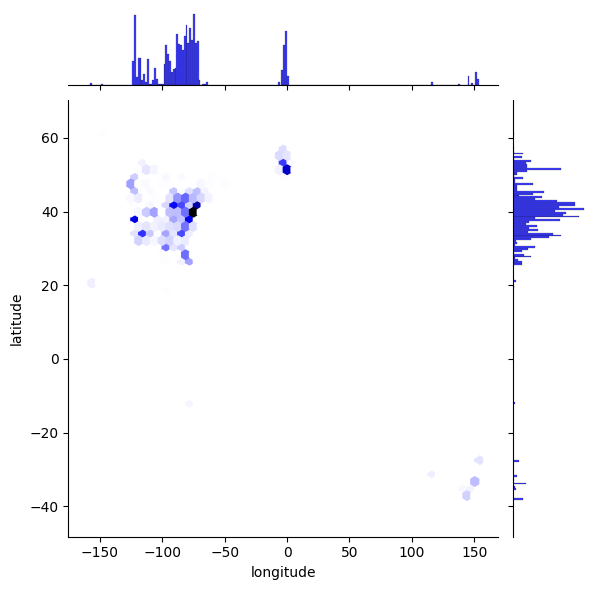

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Ensure that the latitude and longitude are of float type
# df_master['latitude'] = df_master['latitude_longitude'].apply(lambda x: x[0])
# df_master['longitude'] = df_master['latitude_longitude'].apply(lambda x: x[1])

# Create a hexbin plot with 'latitude' on the y-axis and 'longitude' on the x-axis
sns.jointplot(data=df_master, x='longitude', y='latitude', kind='hex', color='blue')

# Display the plot
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px


fig = px.scatter_geo(df_master,
                     lat='latitude',
                     lon='longitude',
                     title='Geographical Plot of Cities')

fig.update_layout(showlegend=True, geo=dict(
    landcolor='rgb(217, 217, 217)',
))

fig.show()


In [ ]:
df_master["job_location"].nunique()

3033

In [ ]:
# df_master.to_csv('/content/drive/MyDrive/418/coordinates_processed_merged.csv', index=False)

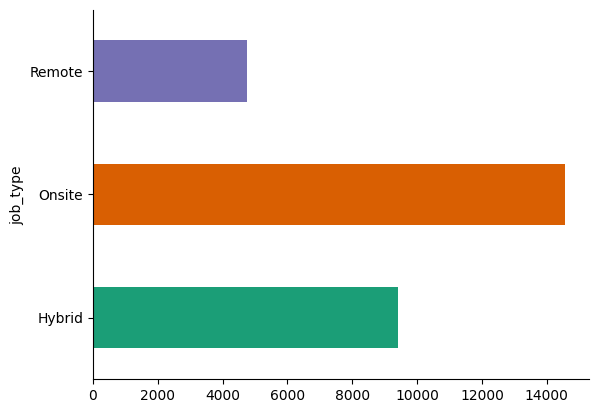

In [ ]:
# @title job_type

from matplotlib import pyplot as plt
import seaborn as sns
df_master.groupby('job_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

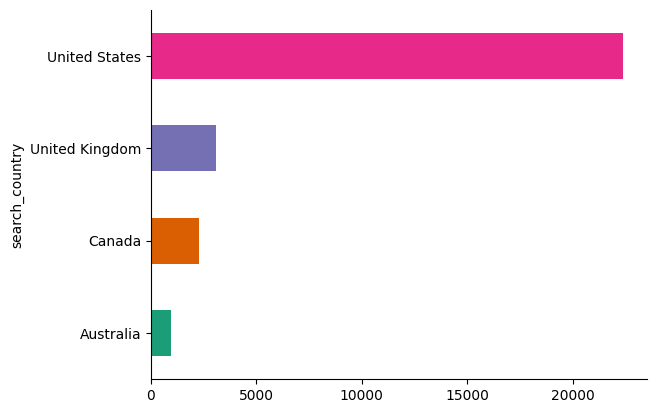

In [ ]:
# @title search_country

from matplotlib import pyplot as plt
import seaborn as sns
df_master.groupby('search_country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28750 entries, 0 to 28749
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           28750 non-null  object 
 1   company             28750 non-null  object 
 2   job_location        28750 non-null  object 
 3   job_link            28750 non-null  object 
 4   search_city         28750 non-null  object 
 5   search_country      28750 non-null  object 
 6   job level           28750 non-null  object 
 7   job_type            28750 non-null  object 
 8   job_summary         28750 non-null  object 
 9   job_skills          28750 non-null  object 
 10  city                28750 non-null  object 
 11  latitude_longitude  28750 non-null  object 
 12  latitude            28750 non-null  float64
 13  longitude           28750 non-null  float64
dtypes: float64(2), object(12)
memory usage: 3.1+ MB


In [ ]:
df_master['job_title'].value_counts().head(25)
# It can be seen that there are repetitions present like Senior Software Engineer and Sr. Software Engineer
# Also Senior Data Analyst vs Sr. Data Analyst.
# Such titles need to be handled and changed into a single category.

Senior Software Engineer                                        735
Software Engineer                                               513
Data Analyst                                                    471
Senior Data Engineer                                            463
Business Analyst                                                415
Data Engineer                                                   400
Senior Data Analyst                                             313
Data Scientist                                                  304
Senior Financial Analyst                                        256
Senior Data Scientist                                           238
Senior Staff AI Data Engineer                                   235
Business Systems Analyst                                        192
Software Developer                                              162
Senior Software Developer                                       142
Business Intelligence Analyst                   

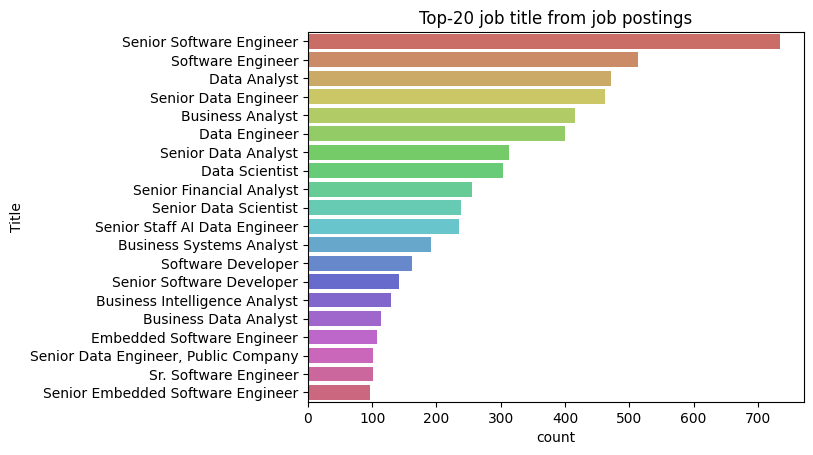

In [ ]:
job_title = df_master["job_title"].value_counts().reset_index()[:20]
job_title.columns = ["Title", "count"]

sns.barplot(x="count", y="Title", data=job_title, color="blue", palette="hls").set(title="Top-20 job title from job postings");

In [ ]:
# job_counts = df_master['job_title'].value_counts().reset_index()
# job_counts.columns = ['job_title', 'count']

# jobs_with_count_one = job_counts[job_counts['count'] == 1]

# print(jobs_with_count_one['job_title'])

In [ ]:
# job_title_counts = df_master['job_title'].value_counts()
# job_title_counts_df = job_title_counts.reset_index()
# job_title_counts_df.columns = ['Job Title', 'Frequency']
# job_title_counts_df.to_csv('./sample_data/title_value_counts.csv', index=False)


In [ ]:
# Resolving Cases such as:
# Resolve Sr. Data Engineer to Senior Data Engineer
# Sr. Data Analyst to Senior Data Analyst
# Or Data Engineer - Scala(U.S. remote) to just Data Engineer
# Senior Data Engineer, Public Company to just Senior Data Engineer
# Labs - Data Scientist - Senior Associate to Data Scientist
# Data Analyst (Bangkok Based, relocation provided) to just Data Analyst

In [ ]:
import re

def normalize_job_title(title):

    title = title.replace('Sr.', 'Senior')
    title = re.sub(r'\bSDE\b', 'Software Development Engineer', title, flags=re.IGNORECASE)
    title = re.sub(r'\bSW Engineer\b', 'Software Engineer', title, flags=re.IGNORECASE)

    title = re.sub(r'\s*-\s*.*', '', title)
    title = re.sub(r'\s*,\s*.*', '', title)
    title = re.sub(r'\(.*\)', '', title)

    title = title.strip()
    title = re.sub(r'[^A-Za-z0-9\s\-,.]', '', title)

    return title

df_master['normalized_job_title'] = df_master['job_title'].apply(normalize_job_title)


print(df_master[['job_title', 'normalized_job_title']])

                                               job_title  \
0                     Market Research & Insights Analyst   
1                            Business Systems Analyst `1   
2                    Senior VAT and Indirect Tax Analyst   
3              Business Intelligence Reporting Analyst 2   
4                           Lead Senior Business Analyst   
...                                                  ...   
28745  Customer Service Representative/Data Analyst/D...   
28746                        HR Systems and Data Analyst   
28747                         Senior Oracle Data Analyst   
28748                            Data Governance Analyst   
28749                   Energy Data and Forecast Analyst   

                                    normalized_job_title  
0                      Market Research  Insights Analyst  
1                             Business Systems Analyst 1  
2                    Senior VAT and Indirect Tax Analyst  
3              Business Intelligence Report

In [ ]:
df_master['normalized_job_title'].value_counts().head(25)

Senior Software Engineer             2111
Software Engineer                    1155
Senior Data Engineer                  852
Data Analyst                          704
Data Engineer                         653
Business Analyst                      627
Senior Data Analyst                   549
Data Scientist                        482
Senior Data Scientist                 461
Senior Financial Analyst              389
Senior Analyst                        313
Software Developer                    294
Business Systems Analyst              294
Lead Software Engineer                262
Senior Software Developer             238
Senior Staff AI Data Engineer         236
Staff Software Engineer               193
Business Intelligence Analyst         158
Senior Embedded Software Engineer     143
Business Data Analyst                 142
Senior Business Analyst               128
Data Center Engineer                  128
Embedded Software Engineer            125
Principal Software Engineer       

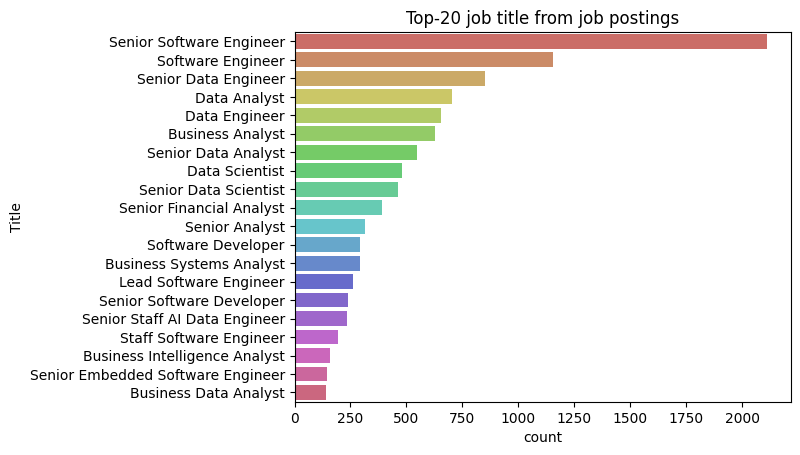

In [ ]:
job_title = df_master["normalized_job_title"].value_counts().reset_index()[:20]
job_title.columns = ["Title", "count"]

sns.barplot(x="count", y="Title", data=job_title, color="blue", palette="hls").set(title="Top-20 job title from job postings");

In [ ]:
df_master.head()

job_title                        company  \
0         Market Research & Insights Analyst  Indiana University Foundation   
1                Business Systems Analyst `1                   Cook Medical   
2        Senior VAT and Indirect Tax Analyst                           Epic   
3  Business Intelligence Reporting Analyst 2                   Cook Medical   
4               Lead Senior Business Analyst         Nashville Toyota North   

       job_location                                           job_link  \
0   Bloomington, IN  https://www.linkedin.com/jobs/view/market-rese...   
1   Bloomington, IN  https://www.linkedin.com/jobs/view/business-sy...   
2   Bloomington, IN  https://www.linkedin.com/jobs/view/senior-vat-...   
3   Bloomington, IN  https://www.linkedin.com/jobs/view/business-in...   
4  Laughlin AFB, TX  https://www.linkedin.com/jobs/view/lead-senior...   

   search_city search_country   job level job_type  \
0  Bloomington  United States  Mid senior   Onsite   
1  Bloomington  United States  Mid senior   Onsite   
2  Bloomington  United States  Mid senior   Onsite   
3  Bloomington  United States  Mid senior   Hybrid   
4      Del Rio  United States  Mid senior   Hybrid   

                                         job_summary  \
0  Company Description\nAre you a high-performer ...   
1  Overview\nThe Business Systems Analyst 1 perfo...   
2  We're looking for an experienced tax professio...   
3  Overview\nThe Business Intelligence Analyst 2 ...   
4  R2C, Inc. is a rapidly growing, SDVOSB headqua...   

                                          job_skills          city  \
0  Data analysis, Market research, Survey develop...   Bloomington   
1  Business Analysis, Technical Writing, Software...   Bloomington   
2  Accounting, Finance, VAT/GST tax regimes, US a...   Bloomington   
3  SAP Business Objects, SQL, Qlik, Data Modeling...   Bloomington   
4  Information technology, Microsoft Office, Data...  Laughlin AFB   

          latitude_longitude   latitude   longitude  \
0  (39.1670396, -86.5342881)  39.167040  -86.534288   
1  (39.1670396, -86.5342881)  39.167040  -86.534288   
2  (39.1670396, -86.5342881)  39.167040  -86.534288   
3  (39.1670396, -86.5342881)  39.167040  -86.534288   
4  (29.3614054, -100.778572)  29.361405 -100.778572   

                        normalized_job_title  
0          Market Research  Insights Analyst  
1                 Business Systems Analyst 1  
2        Senior VAT and Indirect Tax Analyst  
3  Business Intelligence Reporting Analyst 2  
4               Lead Senior Business Analyst

In [ ]:
df_2 = df_master.copy()
# df_master = df_2.copy()

In [ ]:
dominant_jobs = df_master.groupby('latitude_longitude')['normalized_job_title'].agg(
    lambda x: x.value_counts().idxmax()).reset_index(name='dominant_job')

In [ ]:
dominant_jobs.head()

latitude_longitude  \
0                 (-11.9547401, -77.0612044)   
1                 (-11.9862556, -77.0096138)   
2                 (-12.1106354, -77.0471789)   
3                   (-12.46044, 130.8410469)   
4  (-12.463508000000001, 130.84355545363502)   

                                dominant_job  
0                          eCommerce Analyst  
1                       Senior Data Engineer  
2              Business Intelligence Analyst  
3                         Gi3 Senior Analyst  
4  Business Analyst for a Period of 6 Months

In [ ]:
df_master = pd.merge(df_master, dominant_jobs, on='latitude_longitude', how='left')
fig = px.scatter_mapbox(df_master,
                        lat="latitude",
                        lon="longitude",
                        hover_name="dominant_job",
                        zoom=1,
                        height=600,
                        mapbox_style="carto-positron")

fig.show()

In [ ]:
# Next thing to do is Text-preprocessing. Primarily for Job description and Normalized job title column.
# - tokenization
# - case handling, stop word removal
# - punctutation handling
# - lemmatization
# - POS tagging (maybe)
# - Vectorization

import nltk
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords #list of lexical stop words
from string import punctuation #sets of punctuation
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def text_preprocessing(data_master):

    data_master["job_skills_summary"] = data_master["job_skills_summary"].apply(lambda x: re.sub( r"([A-Z][^a-z]*)", r" \1", x))
    data_master["job_skills_summary"] = data_master["job_skills_summary"].str.lower()

    return data_master

def get_pos(data_master):

    texts = data_master["job_skills_summary"].tolist() #extract the Text column to a list of string
    tagged_texts = pos_tag_sents(map(word_tokenize, texts))

    #add the column back to the DataFrame
    data_master["POS"] = tagged_texts

    return data_master


def get_informative_token(data_master):
    """
    Get list of pair with POS which one play a role in define job positions
    Delete noninformative part-of-speech: pronouns, preposition and postposition, etc.

    I wanted to remove ADJ, but I couldn't do it because I lost meaningful words
    """
    pos_noninformative = [".", "CC", "CD", "DT", "IN", "LS", "MD", "POS", "PRP",
                          "PRP$", "TO", "UH", "WDT", "WP", "WP$", "WRB"]

    data_master["POS_clean"] = data_master["POS"].apply(lambda x: [pair for pair in x if pair[0] != "nbsp" and pair[1] not in pos_noninformative])

    return data_master


def get_only_token(data_master):
    """
    Get column: list of token with meaningful part-of-speech
    """
    data_master["clean_token"] = data_master["POS_clean"].apply(lambda x: [word[0] for word in x])

    return data_master


def get_count_of_tokens(data_master):
    """
    Get column with words number in job description
    """
    data_master["token_number"] = data_master["clean_token"].apply(lambda x: len(x))

    return data_master


In [ ]:
duplicates = df_master[df_master.duplicated(subset='job_summary', keep=False)]
duplicates_sorted = duplicates.sort_values(by='job_summary')
duplicates_sorted.head(4)

job_title  \
23615  Remote - Senior Application Engineer (Data Sim...   
25121  Remote - Senior Application Engineer (Data Sim...   
28708                                 Big Data Developer   
20421                                 Big Data Developer   

                                                 company         job_location  \
23615  TechFetch.com - On Demand Tech Workforce hirin...       Canonsburg, PA   
25121  TechFetch.com - On Demand Tech Workforce hirin...       Canonsburg, PA   
28708                                     ASK Consulting  Ridgefield Park, NJ   
20421                                     ASK Consulting  Ridgefield Park, NJ   

                                                job_link   search_city  \
23615  https://www.linkedin.com/jobs/view/remote-seni...       Weirton   
25121  https://www.linkedin.com/jobs/view/remote-seni...  Steubenville   
28708  https://www.linkedin.com/jobs/view/big-data-de...     Greenwich   
20421  https://www.linkedin.com/jobs/view/big-data-de...         Nyack   

      search_country   job level job_type  \
23615  United States  Mid senior   Remote   
25121  United States  Mid senior   Remote   
28708  United States  Mid senior   Onsite   
20421  United States  Mid senior   Onsite   

                                             job_summary  \
23615  "ALL our jobs are US based and candidates must...   
25121  "ALL our jobs are US based and candidates must...   
28708  "All candidates must be directly contracted by...   
20421  "All candidates must be directly contracted by...   

                                              job_skills             city  \
23615  Data Simulation, PLM, Aras Innovator, Siemens ...       Canonsburg   
25121  Data Simulation, PLM, Aras Innovator, Siemens ...       Canonsburg   
28708  SQL, Python, Spark, Hadoop, Kafka, Hive, Impal...  Ridgefield Park   
20421  SQL, Hive, Python, Spark, Hadoop, Kafka, Impal...  Ridgefield Park   

              latitude_longitude   latitude  longitude normalized_job_title  
23615   (40.2588431, -80.186732)  40.258843 -80.186732               Remote  
25121   (40.2588431, -80.186732)  40.258843 -80.186732               Remote  
28708  (40.8570442, -74.0215285)  40.857044 -74.021529   Big Data Developer  
20421  (40.8570442, -74.0215285)  40.857044 -74.021529   Big Data Developer

In [ ]:
df_master = df_master.drop_duplicates(subset=['job_summary'], keep='first')

In [ ]:
df_master["job_summary"].duplicated().sum()

0

In [ ]:
df_master['job_skills_summary'] =  df_master['job_skills'] + " " + df_master['job_summary']


In [ ]:
df_master.head(2)

job_title                        company  \
0  Market Research & Insights Analyst  Indiana University Foundation   
1         Business Systems Analyst `1                   Cook Medical   

      job_location                                           job_link  \
0  Bloomington, IN  https://www.linkedin.com/jobs/view/market-rese...   
1  Bloomington, IN  https://www.linkedin.com/jobs/view/business-sy...   

   search_city search_country   job level job_type  \
0  Bloomington  United States  Mid senior   Onsite   
1  Bloomington  United States  Mid senior   Onsite   

                                         job_summary  \
0  Company Description\nAre you a high-performer ...   
1  Overview\nThe Business Systems Analyst 1 perfo...   

                                          job_skills         city  \
0  Data analysis, Market research, Survey develop...  Bloomington   
1  Business Analysis, Technical Writing, Software...  Bloomington   

          latitude_longitude  latitude  longitude  \
0  (39.1670396, -86.5342881)  39.16704 -86.534288   
1  (39.1670396, -86.5342881)  39.16704 -86.534288   

                normalized_job_title  \
0  Market Research  Insights Analyst   
1         Business Systems Analyst 1   

                                  job_skills_summary  
0  Data analysis, Market research, Survey develop...  
1  Business Analysis, Technical Writing, Software...

In [ ]:
df_master = text_preprocessing(df_master)

In [ ]:
df_master["job_skills_summary"].describe()

count                                                 21926
unique                                                21926
top        data analysis,  market research,  survey deve...
freq                                                      1
Name: job_skills_summary, dtype: object

In [ ]:
df_master = get_pos(df_master)
df_master = get_informative_token(df_master)
df_master = get_only_token(df_master)
df_master = get_count_of_tokens(df_master)

In [ ]:
df_master.head(10)

job_title  \
0         Market Research & Insights Analyst   
1                Business Systems Analyst `1   
2        Senior VAT and Indirect Tax Analyst   
3  Business Intelligence Reporting Analyst 2   
4               Lead Senior Business Analyst   
5                           Business Analyst   
6                                GIS Analyst   
7                Sr Business Systems Analyst   
8               Senior Network Analyst - DDI   
9                Sr Business Systems Analyst   

                                company      job_location  \
0         Indiana University Foundation   Bloomington, IN   
1                          Cook Medical   Bloomington, IN   
2                                  Epic   Bloomington, IN   
3                          Cook Medical   Bloomington, IN   
4                Nashville Toyota North  Laughlin AFB, TX   
5                     American National   Springfield, MO   
6  Associated Electric Cooperative Inc.   Springfield, MO   
7                   O'Reilly Auto Parts   Springfield, MO   
8                     Jobs for Humanity   Springfield, MO   
9                   O'Reilly Auto Parts   Springfield, MO   

                                            job_link  search_city  \
0  https://www.linkedin.com/jobs/view/market-rese...  Bloomington   
1  https://www.linkedin.com/jobs/view/business-sy...  Bloomington   
2  https://www.linkedin.com/jobs/view/senior-vat-...  Bloomington   
3  https://www.linkedin.com/jobs/view/business-in...  Bloomington   
4  https://www.linkedin.com/jobs/view/lead-senior...      Del Rio   
5  https://www.linkedin.com/jobs/view/business-an...      Spokane   
6  https://www.linkedin.com/jobs/view/gis-analyst...      Spokane   
7  https://www.linkedin.com/jobs/view/sr-business...      Spokane   
8  https://www.linkedin.com/jobs/view/senior-netw...      Spokane   
9  https://www.linkedin.com/jobs/view/sr-business...      Spokane   

  search_country   job level job_type  \
0  United States  Mid senior   Onsite   
1  United States  Mid senior   Onsite   
2  United States  Mid senior   Onsite   
3  United States  Mid senior   Hybrid   
4  United States  Mid senior   Hybrid   
5  United States   Associate   Onsite   
6  United States   Associate   Hybrid   
7  United States  Mid senior   Onsite   
8  United States  Mid senior   Onsite   
9  United States  Mid senior   Onsite   

                                         job_summary  \
0  Company Description\nAre you a high-performer ...   
1  Overview\nThe Business Systems Analyst 1 perfo...   
2  We're looking for an experienced tax professio...   
3  Overview\nThe Business Intelligence Analyst 2 ...   
4  R2C, Inc. is a rapidly growing, SDVOSB headqua...   
5  Are you a Business Analyst with a proven abili...   
6  Are you passionate about the power of geograph...   
7  O’Reilly Auto Parts has a proven track record ...   
8  Company Description\nJobs for Humanity is part...   
9  Compensation Pay Range\n$103,000.00 - $130,000...   

                                          job_skills          city  \
0  Data analysis, Market research, Survey develop...   Bloomington   
1  Business Analysis, Technical Writing, Software...   Bloomington   
2  Accounting, Finance, VAT/GST tax regimes, US a...   Bloomington   
3  SAP Business Objects, SQL, Qlik, Data Modeling...   Bloomington   
4  Information technology, Microsoft Office, Data...  Laughlin AFB   
5  Business Analysis, Problem Solving, Root Cause...   Springfield   
6  GIS, ArcGIS, ArcGIS Pro, ArcGIS Hub, ArcGIS Po...   Springfield   
7            Tuition Educational Assistance Programs   Springfield   
8  Information Technology, Network Solutions, DDI...   Springfield   
9  Business Analysis, Software Development, SDLC,...   Springfield   

          latitude_longitude   latitude   longitude  \
0  (39.1670396, -86.5342881)  39.167040  -86.534288   
1  (39.1670396, -86.5342881)  39.167040  -86.534288   
2  (39.1670396, -86.5342881)  39.167040  -86.534288   
3  (39.1670396

In [ ]:
df_master["clean_token"] = [
    [token for token in tokens if len(token) > 1 and token not in ["company", "description", "title", "job", "skills"]]
    for tokens in df_master["clean_token"]
]

# Assuming get_count_of_tokens is a function that updates the DataFrame based on the clean_token column
# Update count_token_number_in_job column
df_master = get_count_of_tokens(df_master)

# Display the first few rows to verify changes
df_master.head()


job_title                        company  \
0         Market Research & Insights Analyst  Indiana University Foundation   
1                Business Systems Analyst `1                   Cook Medical   
2        Senior VAT and Indirect Tax Analyst                           Epic   
3  Business Intelligence Reporting Analyst 2                   Cook Medical   
4               Lead Senior Business Analyst         Nashville Toyota North   

       job_location                                           job_link  \
0   Bloomington, IN  https://www.linkedin.com/jobs/view/market-rese...   
1   Bloomington, IN  https://www.linkedin.com/jobs/view/business-sy...   
2   Bloomington, IN  https://www.linkedin.com/jobs/view/senior-vat-...   
3   Bloomington, IN  https://www.linkedin.com/jobs/view/business-in...   
4  Laughlin AFB, TX  https://www.linkedin.com/jobs/view/lead-senior...   

   search_city search_country   job level job_type  \
0  Bloomington  United States  Mid senior   Onsite   
1  Bloomington  United States  Mid senior   Onsite   
2  Bloomington  United States  Mid senior   Onsite   
3  Bloomington  United States  Mid senior   Hybrid   
4      Del Rio  United States  Mid senior   Hybrid   

                                         job_summary  \
0  Company Description\nAre you a high-performer ...   
1  Overview\nThe Business Systems Analyst 1 perfo...   
2  We're looking for an experienced tax professio...   
3  Overview\nThe Business Intelligence Analyst 2 ...   
4  R2C, Inc. is a rapidly growing, SDVOSB headqua...   

                                          job_skills          city  \
0  Data analysis, Market research, Survey develop...   Bloomington   
1  Business Analysis, Technical Writing, Software...   Bloomington   
2  Accounting, Finance, VAT/GST tax regimes, US a...   Bloomington   
3  SAP Business Objects, SQL, Qlik, Data Modeling...   Bloomington   
4  Information technology, Microsoft Office, Data...  Laughlin AFB   

          latitude_longitude   latitude   longitude  \
0  (39.1670396, -86.5342881)  39.167040  -86.534288   
1  (39.1670396, -86.5342881)  39.167040  -86.534288   
2  (39.1670396, -86.5342881)  39.167040  -86.534288   
3  (39.1670396, -86.5342881)  39.167040  -86.534288   
4  (29.3614054, -100.778572)  29.361405 -100.778572   

                        normalized_job_title  \
0          Market Research  Insights Analyst   
1                 Business Systems Analyst 1   
2        Senior VAT and Indirect Tax Analyst   
3  Business Intelligence Reporting Analyst 2   
4               Lead Senior Business Analyst   

                                  job_skills_summary  \
0   data analysis,  market research,  survey deve...   
1   business  analysis,  technical  writing,  sof...   
2   accounting,  finance,  vat/gst tax regimes,  ...   
3   sap business  objects,  sql, qlik,  data  mod...   
4   information technology,  microsoft  office,  ...   

                                                 POS  \
0  [(data, NNS), (analysis, NN), (,, ,), (market,...   
1  [(business, NN), (analysis, NN), (,, ,), (tech...   
2  [(accounting, NN), (,, ,), (finance, NN), (,, ...   
3  [(sap, NN), (business, NN), (objects, NNS), (,...   
4  [(information, NN), (technology, NN), (,, ,), ...   

                                           POS_clean  \
0  [(data, NNS), (analysis, NN), (,, ,), (market,...   
1  [(business, NN), (analysis, NN), (,, ,), (tech...   
2  [(accounting, NN), (,, ,), (finance, NN), (,, ...   
3  [(sap, NN), (business, NN), (objects, NNS), (,...   
4  [(information, NN), (technology, NN), (,, ,), ...   

                                         clean_token  token_number  
0  [data, analysis, market, research, survey, dev...           610  
1  [business, analysis, technical, writing, softw...           372  
2  [accounting, finance, vat/gst, tax, regimes, f...           343  
3  [sap, business, objects, sql, qlik, data, mode...           477  
4  [information, technology, microsoft, office, d...    

In [ ]:
df_master["clean_job_desc"] = [" ".join(x) for x in df_master["clean_token"]]
df_master.head(5)

job_title                        company  \
0         Market Research & Insights Analyst  Indiana University Foundation   
1                Business Systems Analyst `1                   Cook Medical   
2        Senior VAT and Indirect Tax Analyst                           Epic   
3  Business Intelligence Reporting Analyst 2                   Cook Medical   
4               Lead Senior Business Analyst         Nashville Toyota North   

       job_location                                           job_link  \
0   Bloomington, IN  https://www.linkedin.com/jobs/view/market-rese...   
1   Bloomington, IN  https://www.linkedin.com/jobs/view/business-sy...   
2   Bloomington, IN  https://www.linkedin.com/jobs/view/senior-vat-...   
3   Bloomington, IN  https://www.linkedin.com/jobs/view/business-in...   
4  Laughlin AFB, TX  https://www.linkedin.com/jobs/view/lead-senior...   

   search_city search_country   job level job_type  \
0  Bloomington  United States  Mid senior   Onsite   
1  Bloomington  United States  Mid senior   Onsite   
2  Bloomington  United States  Mid senior   Onsite   
3  Bloomington  United States  Mid senior   Hybrid   
4      Del Rio  United States  Mid senior   Hybrid   

                                         job_summary  \
0  Company Description\nAre you a high-performer ...   
1  Overview\nThe Business Systems Analyst 1 perfo...   
2  We're looking for an experienced tax professio...   
3  Overview\nThe Business Intelligence Analyst 2 ...   
4  R2C, Inc. is a rapidly growing, SDVOSB headqua...   

                                          job_skills  ...  \
0  Data analysis, Market research, Survey develop...  ...   
1  Business Analysis, Technical Writing, Software...  ...   
2  Accounting, Finance, VAT/GST tax regimes, US a...  ...   
3  SAP Business Objects, SQL, Qlik, Data Modeling...  ...   
4  Information technology, Microsoft Office, Data...  ...   

          latitude_longitude   latitude   longitude  \
0  (39.1670396, -86.5342881)  39.167040  -86.534288   
1  (39.1670396, -86.5342881)  39.167040  -86.534288   
2  (39.1670396, -86.5342881)  39.167040  -86.534288   
3  (39.1670396, -86.5342881)  39.167040  -86.534288   
4  (29.3614054, -100.778572)  29.361405 -100.778572   

                        normalized_job_title  \
0          Market Research  Insights Analyst   
1                 Business Systems Analyst 1   
2        Senior VAT and Indirect Tax Analyst   
3  Business Intelligence Reporting Analyst 2   
4               Lead Senior Business Analyst   

                                  job_skills_summary  \
0   data analysis,  market research,  survey deve...   
1   business  analysis,  technical  writing,  sof...   
2   accounting,  finance,  vat/gst tax regimes,  ...   
3   sap business  objects,  sql, qlik,  data  mod...   
4   information technology,  microsoft  office,  ...   

                                                 POS  \
0  [(data, NNS), (analysis, NN), (,, ,), (market,...   
1  [(business, NN), (analysis, NN), (,, ,), (tech...   
2  [(accounting, NN), (,, ,), (finance, NN), (,, ...   
3  [(sap, NN), (business, NN), (objects, NNS), (,...   
4  [(information, NN), (technology, NN), (,, ,), ...   

                                           POS_clean  \
0  [(data, NNS), (analysis, NN), (,, ,), (market,...   
1  [(business, NN), (analysis, NN), (,, ,), (tech...   
2  [(accounting, NN), (,, ,), (finance, NN), (,, ...   
3  [(sap, NN), (business, NN), (objects, NNS), (,...   
4  [(information, NN), (technology, NN), (,, ,), ...   

                                         clean_token token_number  \
0  [data, analysis, market, research, survey, dev...          610   
1  [business, analysis, technical, writing, softw...          372   
2  [accounting, finance, vat/gst, tax, regimes, f...          343   
3  [sap, business, objects, sql, qlik, data, mode...          477   
4  [information, technology, microsoft, office, d...          349   

                                      cl

In [ ]:
wnl = WordNetLemmatizer()
patterns = "[^a-zA-Z \n\.]"

stopwords_eng = stopwords.words("english")
stopwords_eng.extend(["race", "ethnicity", "religion", "color", "sex", "age",  "national", "origin", "genetic", "information", "sexual",
                      "orientation", "disability", "gender", "identity", "week", "per", "please", "offer", "part time", "example", "compensation",
                      "monday", "tuesday", "wednesday", "thursday", "friday",
                     "saturday", "sunday", "pm", "am"])

def lemmatize_sentence(text):
    text = re.sub(patterns, " ", text)
    tokens = []

    for token in text.split():
        if token and token not in stopwords_eng:
            token = token.strip()
            token = wnl.lemmatize(token)

            tokens.append(token)

    return " ".join(tokens)

In [ ]:
print("Before lemmatization:\n", df_master["clean_job_desc"].iloc[555])
print("\nAfter lemmatization:\n", lemmatize_sentence(df_master["clean_job_desc"].iloc[555]))

Before lemmatization:
 data analysis data visualization data reconciliation ms excel data discrepancy identification cms fmis tableau dashboard power point access sql odbc service now business system analyst position hybrid location boston ma duration months data analysis visualization maintenance reconciliation creating new graphs reports excel e.g spending current year prior years creating automating in-take tools excel improve user experience data submittals identifying discrepancies data different data sources reconciling differences various systems excel cms fmis performing ad-hoc analyses data cms identifying data need be updated modified e.g labor cost adjustment fy21 rollover maintain update data cms tableau data visualization participate dashboard enhancement project deck development developing slides power point various cpo presentations updates creating calculating formatting supporting tables graphs excel cms enhancements gathering requirements working business stakeholders

In [ ]:
df_master["job_desc_lem"] = df_master["clean_job_desc"].apply(lemmatize_sentence)
df_master.tail(5)

job_title  \
28735         Lead Data Engineer / Gaming space / onsite   
28738                                      Data Engineer   
28742  Installation Supervisor (Data Cables / Interna...   
28743                          Rewards Data / HR Analyst   
28744  Installation Supervisor Data Cables / Internat...   

                               company  \
28735  Motion Recruitment Partners LLC   
28738                        Whitbread   
28742        Ernest Gordon Recruitment   
28743                       Latcom Ltd   
28744        Ernest Gordon Recruitment   

                                 job_location  \
28735                        Santa Monica, CA   
28738      Dunstable, England, United Kingdom   
28742    Northampton, England, United Kingdom   
28743  Milton Keynes, England, United Kingdom   
28744    Northampton, England, United Kingdom   

                                                job_link    search_city  \
28735  https://www.linkedin.com/jobs/view/lead-data-e...  Thousand Oaks   
28738  https://uk.linkedin.com/jobs/view/data-enginee...  Milton Keynes   
28742  https://uk.linkedin.com/jobs/view/installation...  Milton Keynes   
28743  https://uk.linkedin.com/jobs/view/rewards-data...  Milton Keynes   
28744  https://uk.linkedin.com/jobs/view/installation...  Milton Keynes   

       search_country   job level job_type  \
28735   United States  Mid senior   Onsite   
28738  United Kingdom  Mid senior   Onsite   
28742  United Kingdom  Mid senior   Onsite   
28743  United Kingdom  Mid senior   Onsite   
28744  United Kingdom  Mid senior   Onsite   

                                             job_summary  \
28735  Dice is the leading career destination for tec...   
28738  Data Engineer, Full-Time, Permanent, Dunstable...   
28742  40,000 - 45,000 + Company Van + (47k - 52k) OT...   
28743  Rewards Data / HR Analyst, required to work in...   
28744  Installation Supervisor (Data Cables / Interna...   

                                              job_skills  ...   latitude  \
28735  Data Engineering, Data Analytics, Machine Lear...  ...  34.019470   
28738  Data Engineering, Data Pipelines, CI/CD, MLOps...  ...  51.886132   
28742  Installation, Data Cables, Telecommunications,...  ...  52.237885   
28743  Microsoft Excel, Microsoft Word, Microsoft Pow...  ...  52.040650   
28744  Installation Supervisor, Data Cables, Telecomm...  ...  52.237885   

        longitude                               normalized_job_title  \
28735 -118.491227           Lead Data Engineer  Gaming space  onsite   
28738   -0.520934                                      Data Engineer   
28742   -0.896364                            Installation Supervisor   
28743   -0.759409                           Rewards Data  HR Analyst   
28744   -0.896364  Installation Supervisor Data Cables  Internati...   

                                      job_skills_summary  \
28735   data  engineering,  data  analytics,  machine...   
28738   data  engineering,  data  pipelines,  ci/cd, ...   
28742   installation,  data  cables,  telecommunicati...   
28743   microsoft  excel,  microsoft  word,  microsof...   
28744   installation  supervisor,  data  cables,  tel...   

                                                     POS  \
28735  [(data, NNS), (engineering, NN), (,, ,), (data...   
28738  [(data, NNS), (engineering, NN), (,, ,), (data...   
28742  [(installation, NN), (,, ,), (data, NN), (cabl...   
28743  [(microsoft, JJ), (excel, NN), (,, ,), (micros...   
28744  [(installation, NN), (supervisor, NN), (,, ,),...   

                                               POS_clean  \
28735  [(data, NNS), (engineering, NN), (,, ,), (data...   
28738  [(data, NNS), (engineering, NN), (,, ,), (data...   
28742  [(installation, NN), (,, ,), (data, NN), (cabl...   
28743  [(microsoft, JJ), (excel, NN), (,, ,), (micros...   
28744  [(installation, NN), (supervisor, NN), (,, ,),...   

                                             clean_token token_number  \
287

In [ ]:
df_master["token_number_after_lem"] = [len(word.split()) for word in df_master["job_desc_lem"]]
df_master.head()

job_title                        company  \
0         Market Research & Insights Analyst  Indiana University Foundation   
1                Business Systems Analyst `1                   Cook Medical   
2        Senior VAT and Indirect Tax Analyst                           Epic   
3  Business Intelligence Reporting Analyst 2                   Cook Medical   
4               Lead Senior Business Analyst         Nashville Toyota North   

       job_location                                           job_link  \
0   Bloomington, IN  https://www.linkedin.com/jobs/view/market-rese...   
1   Bloomington, IN  https://www.linkedin.com/jobs/view/business-sy...   
2   Bloomington, IN  https://www.linkedin.com/jobs/view/senior-vat-...   
3   Bloomington, IN  https://www.linkedin.com/jobs/view/business-in...   
4  Laughlin AFB, TX  https://www.linkedin.com/jobs/view/lead-senior...   

   search_city search_country   job level job_type  \
0  Bloomington  United States  Mid senior   Onsite   
1  Bloomington  United States  Mid senior   Onsite   
2  Bloomington  United States  Mid senior   Onsite   
3  Bloomington  United States  Mid senior   Hybrid   
4      Del Rio  United States  Mid senior   Hybrid   

                                         job_summary  \
0  Company Description\nAre you a high-performer ...   
1  Overview\nThe Business Systems Analyst 1 perfo...   
2  We're looking for an experienced tax professio...   
3  Overview\nThe Business Intelligence Analyst 2 ...   
4  R2C, Inc. is a rapidly growing, SDVOSB headqua...   

                                          job_skills  ...   longitude  \
0  Data analysis, Market research, Survey develop...  ...  -86.534288   
1  Business Analysis, Technical Writing, Software...  ...  -86.534288   
2  Accounting, Finance, VAT/GST tax regimes, US a...  ...  -86.534288   
3  SAP Business Objects, SQL, Qlik, Data Modeling...  ...  -86.534288   
4  Information technology, Microsoft Office, Data...  ... -100.778572   

                        normalized_job_title  \
0          Market Research  Insights Analyst   
1                 Business Systems Analyst 1   
2        Senior VAT and Indirect Tax Analyst   
3  Business Intelligence Reporting Analyst 2   
4               Lead Senior Business Analyst   

                                  job_skills_summary  \
0   data analysis,  market research,  survey deve...   
1   business  analysis,  technical  writing,  sof...   
2   accounting,  finance,  vat/gst tax regimes,  ...   
3   sap business  objects,  sql, qlik,  data  mod...   
4   information technology,  microsoft  office,  ...   

                                                 POS  \
0  [(data, NNS), (analysis, NN), (,, ,), (market,...   
1  [(business, NN), (analysis, NN), (,, ,), (tech...   
2  [(accounting, NN), (,, ,), (finance, NN), (,, ...   
3  [(sap, NN), (business, NN), (objects, NNS), (,...   
4  [(information, NN), (technology, NN), (,, ,), ...   

                                           POS_clean  \
0  [(data, NNS), (analysis, NN), (,, ,), (market,...   
1  [(business, NN), (analysis, NN), (,, ,), (tech...   
2  [(accounting, NN), (,, ,), (finance, NN), (,, ...   
3  [(sap, NN), (business, NN), (objects, NNS), (,...   
4  [(information, NN), (technology, NN), (,, ,), ...   

                                         clean_token token_number  \
0  [data, analysis, market, research, survey, dev...          610   
1  [business, analysis, technical, writing, softw...          372   
2  [accounting, finance, vat/gst, tax, regimes, f...          343   
3  [sap, business, objects, sql, qlik, data, mode...          477   
4  [information, technology, microsoft, office, d...          349   

                                      clean_job_desc  \
0  data analysis market research survey developme...   
1  business analysis technical writing software t...   
2  accounting finance vat/gst tax regimes foreign...   
3  sap business objects sql qlik data modeling da...   
4  information tech

In [ ]:
df_master.to_csv('/content/drive/MyDrive/418/text_processed.csv', index=False)

In [4]:
df_master = pd.read_csv('/content/drive/MyDrive/418/text_processed.csv')

In [5]:
df_master.columns

Index(['job_title', 'company', 'job_location', 'job_link', 'search_city',
       'search_country', 'job level', 'job_type', 'job_summary', 'job_skills',
       'city', 'latitude_longitude', 'latitude', 'longitude',
       'normalized_job_title', 'job_skills_summary', 'POS', 'POS_clean',
       'clean_token', 'token_number', 'clean_job_desc', 'job_desc_lem',
       'token_number_after_lem'],
      dtype='object')

In [6]:
df_master.drop(['latitude_longitude', 'POS', 'POS_clean', 'clean_token', 'token_number', 'clean_job_desc', 'job_summary', 'latitude', 'longitude'],  axis=1, inplace=True)

In [7]:
df_master.head(2)

job_title                        company  \
0  Market Research & Insights Analyst  Indiana University Foundation   
1         Business Systems Analyst `1                   Cook Medical   

      job_location                                           job_link  \
0  Bloomington, IN  https://www.linkedin.com/jobs/view/market-rese...   
1  Bloomington, IN  https://www.linkedin.com/jobs/view/business-sy...   

   search_city search_country   job level job_type  \
0  Bloomington  United States  Mid senior   Onsite   
1  Bloomington  United States  Mid senior   Onsite   

                                          job_skills         city  \
0  Data analysis, Market research, Survey develop...  Bloomington   
1  Business Analysis, Technical Writing, Software...  Bloomington   

                normalized_job_title  \
0  Market Research  Insights Analyst   
1         Business Systems Analyst 1   

                                  job_skills_summary  \
0   data analysis,  market research,  survey deve...   
1   business  analysis,  technical  writing,  sof...   

                                        job_desc_lem  token_number_after_lem  
0  data analysis market research survey developme...                     573  
1  business analysis technical writing software t...                     352

Statistics=4181.054, p-value=0.000

NOT normal distribution: The data aren't normally distributed


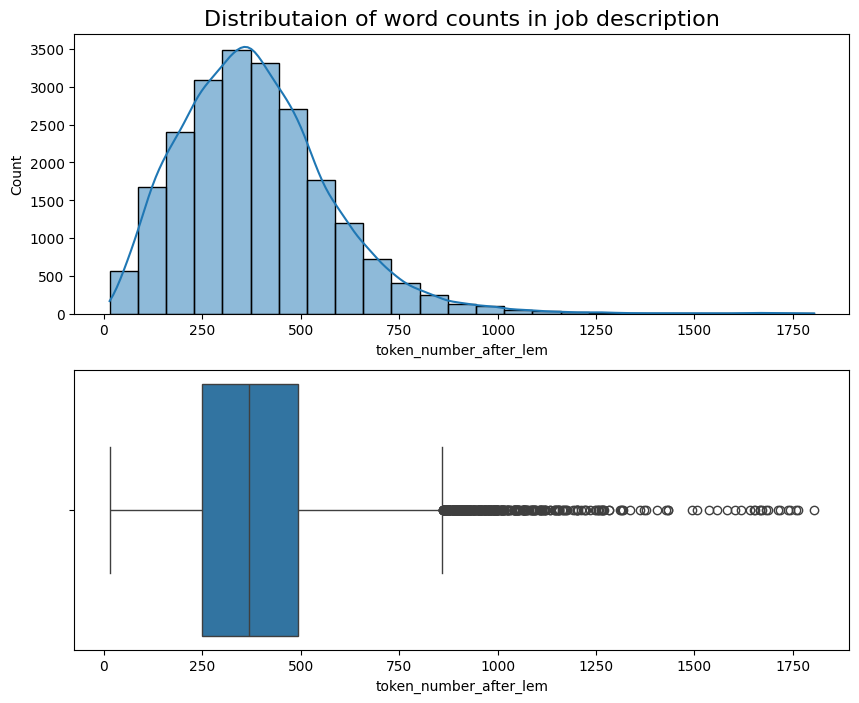

In [8]:
from scipy.stats import normaltest

df_master["token_number_after_lem"].describe()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

histplot = sns.histplot(
    data=df_master,
    x="token_number_after_lem",
    bins=25,
    kde=True,
    ax=axes[0]);
histplot.set_title("Distributaion of word counts in job description",  fontsize=16);

boxplot = sns.boxplot(
    data=df_master,
    x="token_number_after_lem",
    orient="h",
    width=0.9,
    ax=axes[1]);

# Normality test: D'Agostino and Pearson
# Define hypothesis
H0 = "Normal distribution: Data is symmetrically distributed with no skew"
Ha = "NOT normal distribution: The data aren't normally distributed"

# p-value
alpha = 0.05

stat, p = normaltest(df_master["token_number_after_lem"])
print("Statistics=%.3f, p-value=%.3f" % (stat, p))

# Interpretation
if p > alpha:
    print(f"\n{H0}")
else:
    print(f"\n{Ha}")

In [9]:
from collections import Counter, defaultdict

df_master[df_master["token_number_after_lem"] > 800]['job_desc_lem'].count()

630

In [10]:
# Not removing the jobs as outliers with more token. May contain important information needed.

In [12]:
def top_n_skills(skill_lists, n=10):

    aggregated_skills = Counter([skill.strip() for sublist in skill_lists for skill in sublist if skill])
    return aggregated_skills.most_common(n)


skill_counts_per_job_title = df_master.groupby('normalized_job_title')['job_skills'].agg(lambda x: top_n_skills(x, n=10)).reset_index(name='top_skills')
top_20_titles = df_master['normalized_job_title'].value_counts().head(20).index.tolist()

for title in top_20_titles:
    top_skills = skill_counts_per_job_title.loc[skill_counts_per_job_title['normalized_job_title'] == title, 'top_skills'].iloc[0]
    print(f"Top 10 skills for {title}: {top_skills}")

Top 10 skills for Senior Software Engineer: [('Python', 796), ('Java', 723), ('AWS', 690), ('SQL', 577), ('Agile', 489), ('JavaScript', 458), ('Docker', 402), ('Kubernetes', 369), ('Go', 368), ('React', 293)]
Top 10 skills for Software Engineer: [('Python', 357), ('Java', 278), ('AWS', 235), ('JavaScript', 213), ('C++', 208), ('SQL', 203), ('C#', 194), ('Git', 188), ('Software Engineering', 178), ('React', 176)]
Top 10 skills for Business Analyst: [('Business Analysis', 245), ('Project Management', 141), ('Communication', 129), ('Data Analysis', 115), ('Agile', 102), ('SQL', 101), ('Excel', 84), ('Requirements Gathering', 82), ('Business Analyst', 57), ('Project management', 56)]
Top 10 skills for Senior Data Engineer: [('Python', 426), ('SQL', 364), ('AWS', 195), ('Data Engineering', 189), ('Snowflake', 159), ('Spark', 153), ('ETL', 140), ('Java', 127), ('Scala', 119), ('Azure', 116)]
Top 10 skills for Data Engineer: [('Python', 283), ('SQL', 279), ('Data Engineering', 150), ('AWS', 1

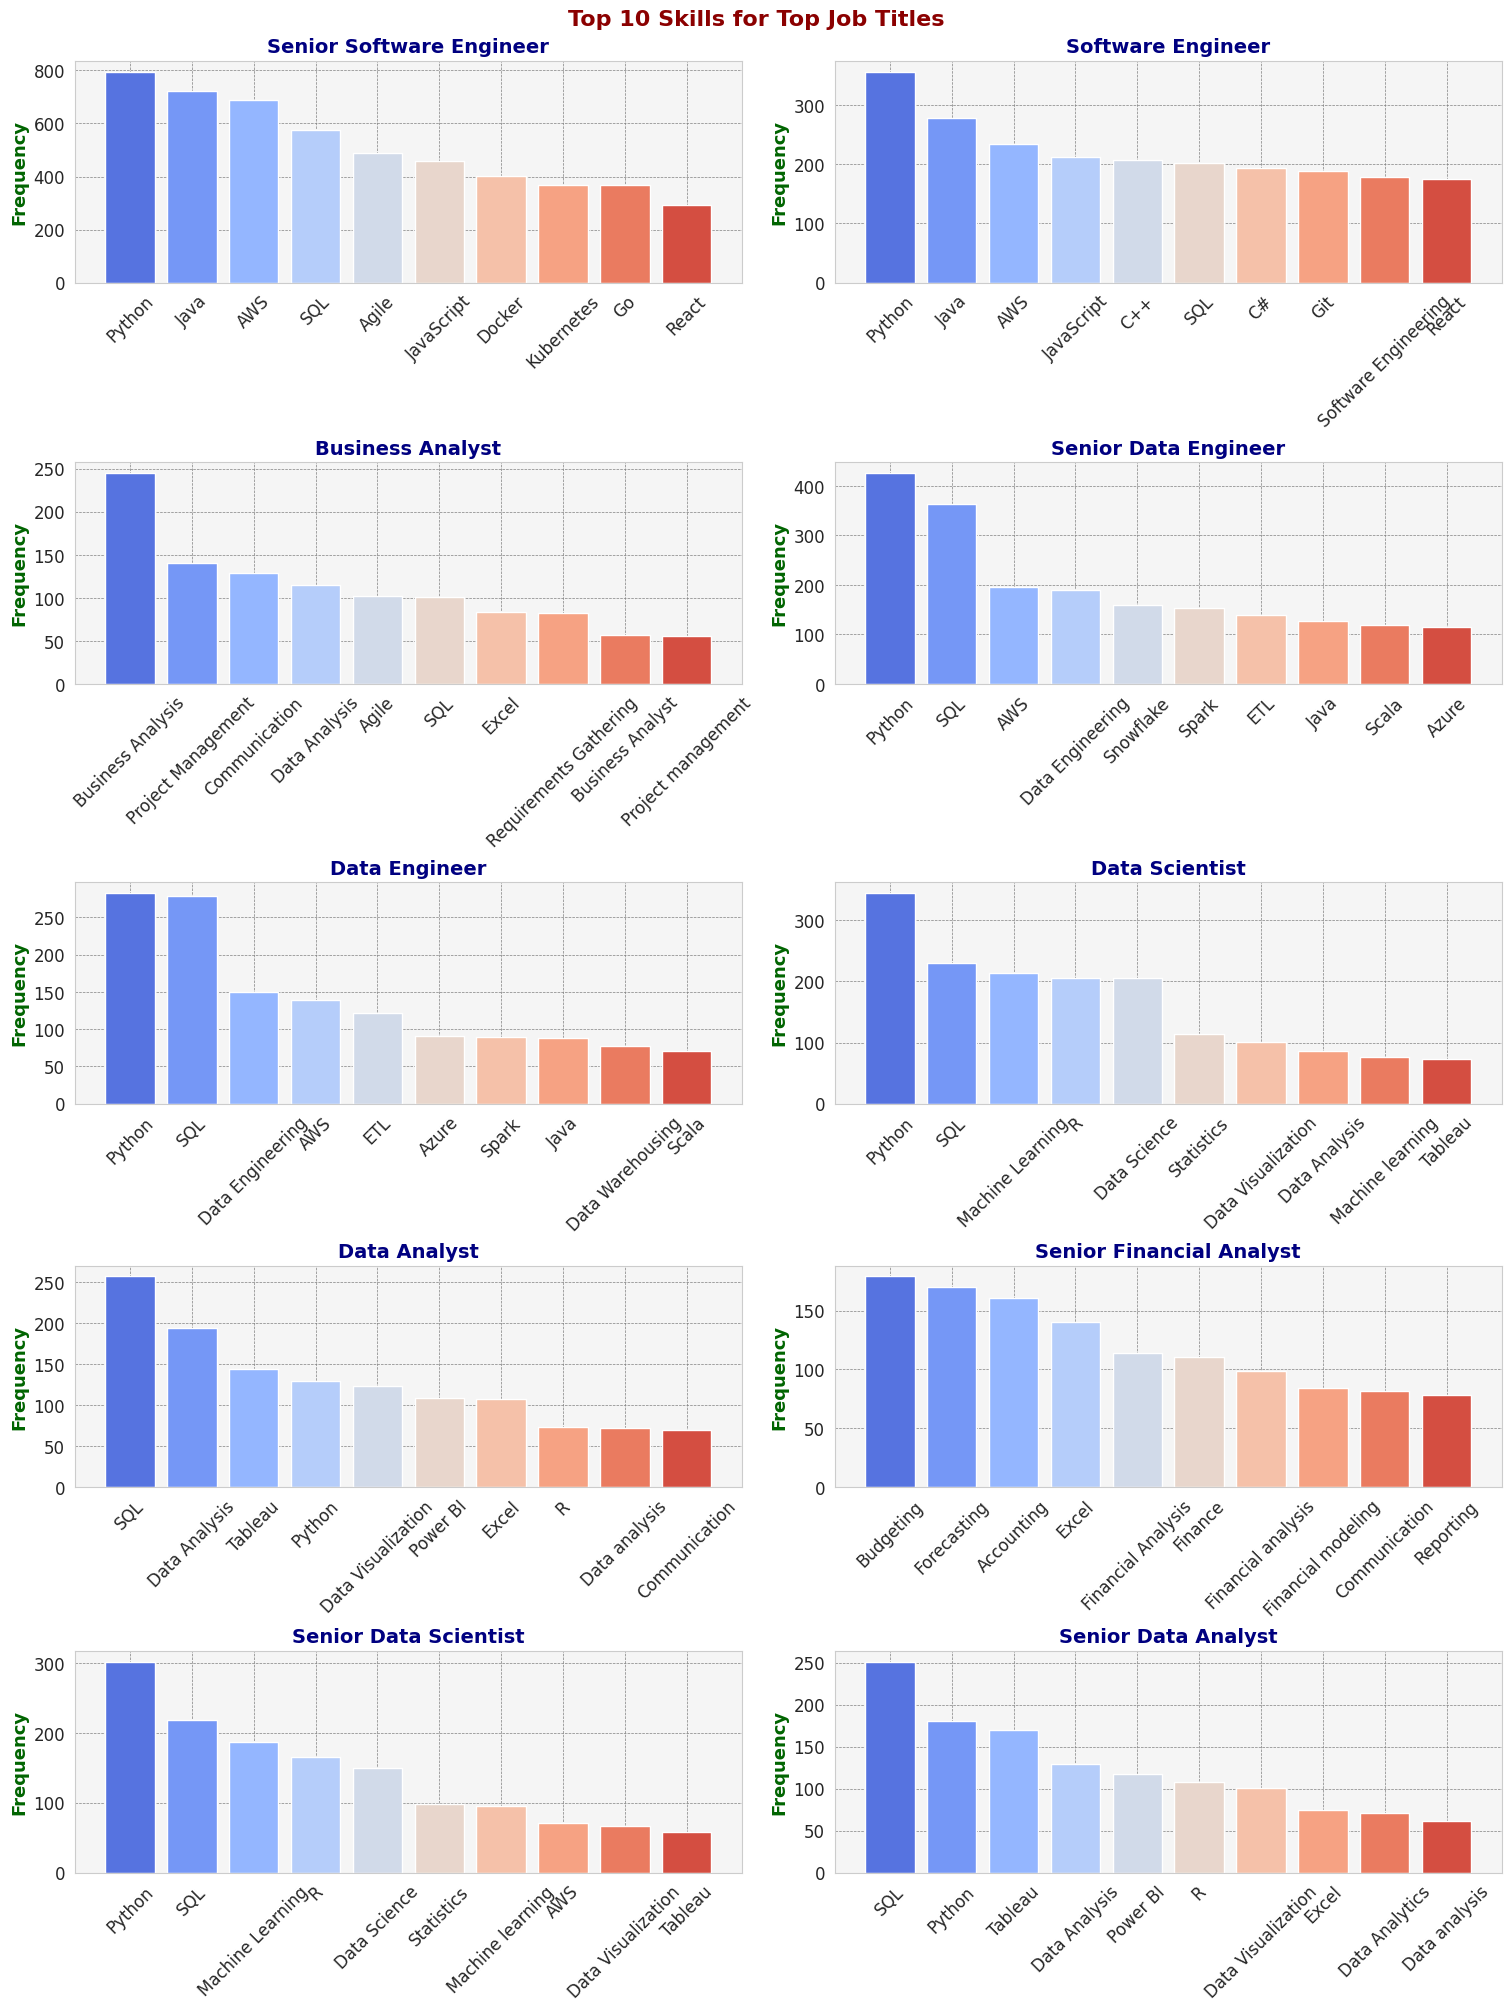

In [15]:
sns.set_style("whitegrid")

ncols = 2
num_titles_to_plot = 10
nrows = num_titles_to_plot // ncols + (num_titles_to_plot % ncols > 0)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows), constrained_layout=True)


palette = sns.color_palette("coolwarm", n_colors=10)
axs = axs.flatten()

for i, title in enumerate(top_20_titles[:num_titles_to_plot]):

    top_skills = skill_counts_per_job_title.loc[skill_counts_per_job_title['normalized_job_title'] == title, 'top_skills'].iloc[0]
    skills, counts = zip(*top_skills)


    axs[i].bar(skills, counts, color=palette)
    axs[i].set_title(title, fontsize=14, fontweight='bold', color='navy')
    axs[i].tick_params(axis='x', rotation=45, labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)
    axs[i].set_ylabel('Frequency', fontsize=13, fontweight='bold', color='darkgreen')


    axs[i].grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
    axs[i].set_facecolor('whitesmoke')

for i in range(len(top_20_titles[:num_titles_to_plot]), len(axs)):
    axs[i].axis('off')

plt.suptitle('Top 10 Skills for Top Job Titles', fontsize=16, fontweight='bold', color='darkred')
plt.show()


In [ ]:
# Saurav's Code Ends Here

In [ ]:
# Usha's and Venkat's Code begin from Here

In [ ]:
# import pandas as pd
# import re

# # Assuming df_master is already loaded with your data
# # Function to normalize job titles
# def normalize_title(title):
#     title = title.lower()
#     title = title.replace('sr.', 'senior').replace('sr', 'senior')
#     title = title.replace('jr.', 'junior').replace('jr', 'junior')
#     title = re.sub(r'[^a-z0-9 ]', '', title)
#     title = ' '.join(title.split())
#     return title

# # Apply the normalization function to the job_title column
# df_master['job_title'] = df_master['job_title'].apply(normalize_title)

# # Now df_master has the 'job_title' column normalized
# df_master.to_csv('normalized_dataset.csv', index=False)


In [ ]:
import pandas as pd

file_path = 'normalized_dataset.csv'
data = pd.read_csv(file_path, encoding='utf-8')

def clean_text(text):
    # Replace the 'â€™' sequence with an apostrophe
    text = text.replace('â€™', "'")
    # Remove other unwanted characters
    for char in ['*', 'â', '€', '™']:
        text = text.replace(char, '')
    return text

# Apply the cleaning function to the 'job_summary' and 'job_skills' columns
data['job_summary'] = data['job_summary'].apply(clean_text)
data['job_skills'] = data['job_skills'].apply(clean_text)

# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_dataset.csv', index=False)


In [ ]:
data.head(50)

In [ ]:
# Usha's and Venkat's Code ends Here